#### Reduzir de 4 dimensções (largura e altura tanto da pétala quanto da sépala) para 2 dimensões o dataset "iris"

In [9]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

iris = load_iris()

numSamples, numFeatures = iris.data.shape

print(numSamples) #amostras
print(numFeatures) #variaveis
print(list(iris.target_names)) #especies a serem classificadas


150
4
['setosa', 'versicolor', 'virginica']


In [16]:
x = iris.data
pca = PCA(n_components=2, whiten=True).fit(x) # ajusta para 2 dimensões utilizando a transformação whiten
x_pca = pca.transform(x)
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [15]:
x_pca

array([[-1.30533786,  0.64836932],
       [-1.31993521, -0.35930856],
       [-1.40496732, -0.29424412],
       [-1.33510889, -0.64613986],
       [-1.32702321,  0.6633044 ],
       [-1.10922246,  1.50488434],
       [-1.3716775 , -0.18160462],
       [-1.27714084,  0.33166784],
       [-1.40369908, -1.17396001],
       [-1.29980851, -0.23095919],
       [-1.2191728 ,  1.30947554],
       [-1.27062918,  0.02990145],
       [-1.35493432, -0.47727214],
       [-1.5677929 , -1.03811965],
       [-1.28618899,  2.39286603],
       [-1.16037307,  2.71623681],
       [-1.2758681 ,  1.64566141],
       [-1.28791362,  0.63304684],
       [-1.06981161,  1.77184386],
       [-1.25858365,  1.04251602],
       [-1.12351854,  0.79442356],
       [-1.23704894,  0.87897239],
       [-1.56396833,  0.27093722],
       [-1.11985996,  0.20037678],
       [-1.14564495, -0.07568135],
       [-1.21903752, -0.29641102],
       [-1.20063096,  0.26582861],
       [-1.24610158,  0.74646111],
       [-1.28365251,

#### Testando se ficou bom

In [19]:
print(pca.explained_variance_ratio_) # preservou 92% da variancia da primeira dimensão e mais 5% da segunda dimensão
print(sum(pca.explained_variance_ratio_))# ainda preserva 97% da informação original 

[0.92461872 0.05306648]
0.977685206318798


#### representação dos dados (agora em 2D!)

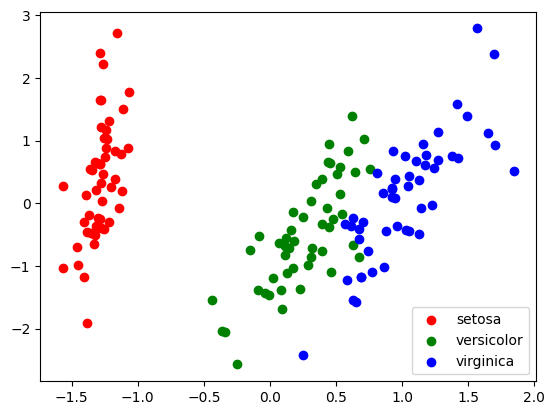

In [22]:
colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()

"""
i será o indice da classe alvo (por exemplo, 0, 1, 2).
c será a cor (alternando entre 'r', 'g', 'b').
label será o nome da especie ('setosa', 'versicolor', 'virginica').

"""

for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(x_pca[iris.target == i, 0], x_pca[iris.target == i, 1],
               c=c, label=label)
    
pl.legend()
pl.show()

# cada ponto no gráfico representa uma amostra do conjunto de dados Iris e cada cor no gráfico é de uma especie